In [15]:
from torchvision import transforms, models 
import torch

import warnings
warnings.filterwarnings(action='ignore')


from data.camMethods import imageMapping
from data.camMethods import preprocessingImage
from data.camMethods import visualizationCAM
from data.camMethods import camMethod
from data.camMethods import camForSet
from data.Hook import actLayerMethod
from data.Hook import maxActivisionValue
from data.Hook import weightFromLayer

from data.Visual import Visual



In [16]:
# PATH_TO_SET = 'dataset/catset'
PATH_TO_SET = 'dataset/mergeDataset'

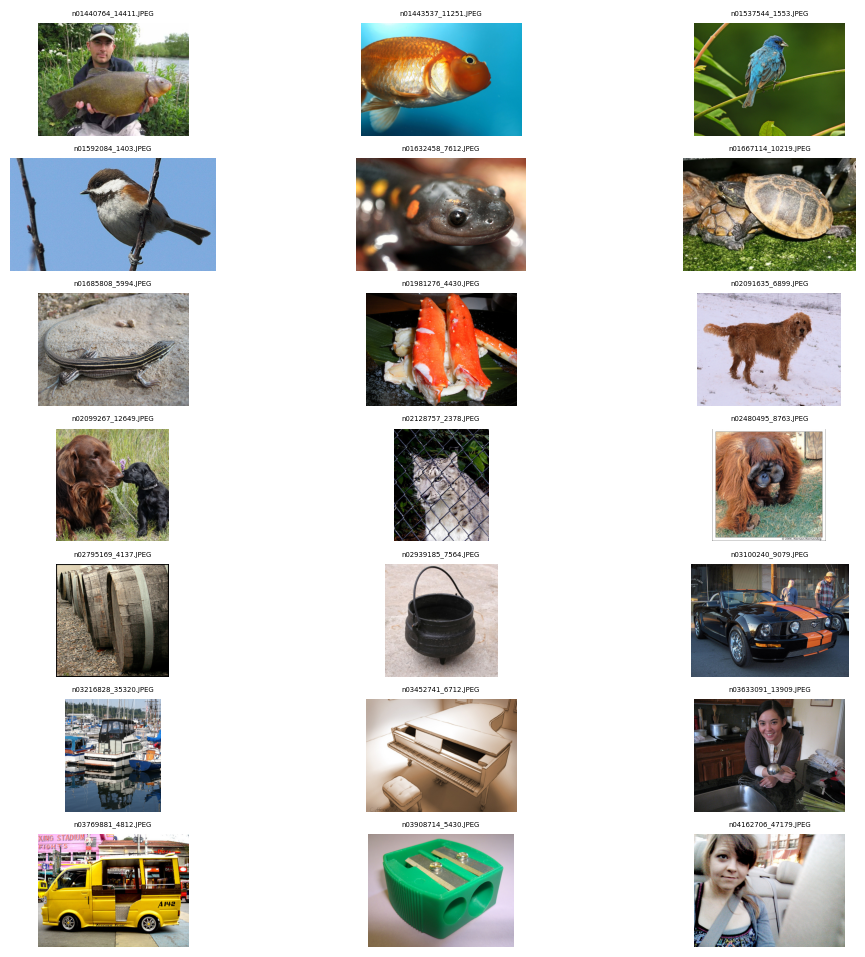

In [17]:
listImage = imageMapping(PATH_TO_SET)  

In [18]:
preprocessingList = preprocessingImage(listImage)
print(len(preprocessingList), '\n', preprocessingList[0].shape)

21 
 torch.Size([1, 3, 224, 224])


In [19]:
model = models.resnet50()
model.load_state_dict(torch.load('model_parameters/resnet50-0676ba61.pth'))
model.eval()
print()

In [20]:
features, predictionList = actLayerMethod(model, preprocessingList)                                       
print('act_len', len(features), '\nact_shape:', features[0].size())

act_len 21 
act_shape: torch.Size([1, 2048, 7, 7])


In [21]:
from torch import topk
import os
idx_list = [topk(pred, 1)[1].int() for pred in predictionList]
list_for_set = [torch.squeeze(lt).tolist() for lt in idx_list]
idx_numpy_type = [torch.squeeze(lt).numpy() for lt in idx_list]
listdir = os.listdir('dataset/catset')
respectation = [{i:j} for i, j in zip(listdir, idx_numpy_type)]
print(respectation)

[{'n02123394_1036.JPEG': array(0)}, {'n02123394_1086.JPEG': array(1)}, {'n02123394_1205.JPEG': array(14)}, {'n02123394_1305.JPEG': array(19)}, {'n02123394_1318.JPEG': array(28)}, {'n02123394_1604.JPEG': array(35)}, {'n02123394_1692.JPEG': array(41)}, {'n02123394_1832.JPEG': array(121)}, {'n02123394_1849.JPEG': array(175)}, {'n02123394_1997.JPEG': array(205)}, {'n02123394_2095.JPEG': array(289)}, {'n02123394_2131.JPEG': array(365)}, {'n02123394_2132.JPEG': array(427)}, {'n02123394_2180.JPEG': array(469)}, {'n02123394_2272.JPEG': array(817)}, {'n02123394_2282.JPEG': array(536)}, {'n02123394_2443.JPEG': array(742)}, {'n02123394_2492.JPEG': array(618)}, {'n02123394_2963.JPEG': array(654)}, {'n02123394_2995.JPEG': array(710)}, {'n02123394_3152.JPEG': array(785)}]


In [22]:
indexNumpy = maxActivisionValue(predictionList)

In [23]:
weight = weightFromLayer(model, 'fc')

In [24]:
camFromPictures = camForSet(features, weight, indexNumpy)
print('size of map:', camFromPictures[0].shape, '\nlen of map_pictures:', len(camFromPictures))
print(type(camFromPictures[0]))

size of map: (7, 7) 
len of map_pictures: 21
<class 'numpy.ndarray'>


In [25]:
visualizationCAM(PATH_TO_SET, camFromPictures)

In [27]:
#Not override ???
vis = Visual(PATH_TO_SET, camFromPictures)
# vis.visualization()